In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(PenW_B)'
os.listdir(PATH)

['sample_submission(0).csv',
 'sample_submission(1).csv',
 'sample_submission(2).csv',
 'sample_submission(3).csv',
 'sample_submission(3_statsmodel).csv',
 'sample_submission(4_lR).csv',
 'sample_submission.csv',
 'test.csv',
 'test_Ch.csv',
 'train.csv',
 'train_Ch.csv',
 'train_pred_sex.csv']

In [3]:
train = pd.read_csv(PATH + '\\train_Ch.csv')
print(train.isna().sum().sum())
train.head()

0


,Species,Island,Clutch Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Sex,Delta_15_N,Delta_13_C,Body_Mass
0,0,0,0,50.0,15.3,220,0,8.30515,-25.19017,5550
1,1,1,1,49.5,19.0,200,0,9.63074,-24.34684,3800
2,0,0,0,45.1,14.4,210,1,8.51951,-27.01854,4400
3,0,0,0,44.5,14.7,214,1,8.20106,-26.16524,4850
4,0,0,1,49.6,16.0,225,0,8.38324,-26.84272,5700


In [4]:
test = pd.read_csv(PATH + '\\test_Ch.csv')
print(test.isna().sum().sum())
test.head()

0


,id,Species,Island,Clutch Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Sex,Delta_15_N,Delta_13_C
0,0,0,0,0,52.0,20.7,210.0,0,9.43146,-24.68440
1,1,1,1,0,55.9,17.0,228.0,0,8.31180,-26.35425
2,2,2,0,0,38.9,18.8,190.0,1,8.36936,-26.11199
3,3,0,0,0,45.2,16.6,191.0,1,9.62357,-24.78984
4,4,2,1,1,37.9,18.6,172.0,1,8.38404,-25.19837


In [63]:
from sklearn.linear_model import LinearRegression
x_list = ['Flipper_Length', 'Species', 'Sex', 'Delta_15_N'] # (2) - (2) > (1) / intercept = False
lm = LinearRegression(fit_intercept = True)
lm.fit(train[x_list], train.Body_Mass)
print(lm.coef_)

[  26.01750618 -199.41778763 -514.52791806 -321.74699639]


In [64]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(lm.predict(train[x_list]), train.Body_Mass)

313.2376110744561

In [67]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
predict['Body Mass (g)'] = lm.predict(test[x_list])
predict.head()
# predict.to_csv(PATH + '\\sample_submission(4_lR).csv', index = False)
# pd.read_csv(PATH + '\\sample_submission(4_lR).csv').head()

,id,Body Mass (g)
0,0,4718.174555
1,1,5347.319120
2,2,3626.188423
3,3,3647.503204
4,4,3153.150066


In [70]:
lm = LinearRegression(fit_intercept = True)
lm.fit(train.drop(['Body_Mass'], axis = 1), train.Body_Mass)
print(lm.coef_)
RMSE(lm.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

[-150.39601243  -97.66366564   26.68304562    2.75855648  -17.98218569
   23.38474673 -539.91366665 -293.97716574  -20.3724633 ]


308.5321137964769

In [8]:
from statsmodels.formula.api import ols 
from statsmodels.api import OLS, add_constant
x_list = ['Flipper_Length', 'Species', 'Sex', 'Delta_15_N']
formula = 'Body_Mass~' + '+'.join(x_list)
model = OLS.from_formula(formula, data = train[x_list + ['Body_Mass']])
result = model.fit()
# print(result.params)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Body_Mass   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.0
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           3.82e-42
Time:                        23:55:50   Log-Likelihood:                -816.91
No. Observations:                 114   AIC:                             1644.
Df Residuals:                     109   BIC:                             1658.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2289.0422   1192.754      1.919      0.058     -74.958    4653.042
Flipper_Length    26.0175      4.022      6.468      0.000      18.046      33.989
Species         -199.4178     61.539     -3.241      0.002    -321.386     -77.449
Sex             -514.5279     71.654     -7.181      0.000    -656.544    -372.512
Delta_15_N      -321.7470     65.717     -4.896      0.000    -451.996    -191.498
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.717
Skew:                           0.260   Prob(JB):                        0.424
Kurtosis:                       3.301   Cond. No.                     8.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(result.predict(train[x_list]), train.Body_Mass)

313.2376110744562

In [76]:
train.columns = ['Species', 'Island', 'Clutch_Completion', 'Culmen_Length',
                 'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C',
                 'Body_Mass']

In [77]:
from statsmodels.formula.api import ols 
from statsmodels.api import OLS, add_constant
x_list = train.drop(['Body_Mass'], axis = 1).columns
formula = 'Body_Mass~' + '+'.join(x_list)
model = OLS.from_formula(formula, data = train)
result = model.fit()
# print(result.params)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Body_Mass   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     61.98
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           9.04e-38
Time:                        00:18:32   Log-Likelihood:                -815.19
No. Observations:                 114   AIC:                             1650.
Df Residuals:                     104   BIC:                             1678.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2263.5408   2229.986      1.015      0.312   -2158.605    6685.686
Species            -150.3960     78.239     -1.922      0.057    -305.546       4.754
Island              -97.6637     68.766     -1.420      0.159    -234.029      38.701
Clutch_Completion    26.6830    105.385      0.253      0.801    -182.299     235.665
Culmen_Length         2.7586     11.495      0.240      0.811     -20.036      25.553
Culmen_Depth        -17.9822     29.988     -0.600      0.550     -77.450      41.486
Flipper_Length       23.3847      5.127      4.561      0.000      13.217      33.552
Sex                -539.9137     92.103     -5.862      0.000    -722.557    -357.271
Delta_15_N         -293.9772     86.600     -3.395      0.001    -465.709    -122.245
Delta_13_C          -20.3725     57.423     -0.355      0.723    -134.245      93.500
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.429
Skew:                           0.252   Prob(JB):                        0.297
Kurtosis:                       3.506   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
RMSE(result.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

308.532113796477

In [83]:
# 릿지모델
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.1, solver = 'sag', random_state = 7)
ridge.fit(train.drop(['Body_Mass'], axis = 1), train.Body_Mass)
RMSE(ridge.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

308.95485267695955

In [89]:
# 라쏘 모델
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(alpha = -1)
lasso.fit(train.drop(['Body_Mass'], axis = 1), train.Body_Mass)
RMSE(lasso.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

C:\Users\Bestc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21436316.891680032, tolerance: 6906.09484649123
  model = cd_fast.enet_coordinate_descent(


308.59174309222834

In [90]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=0.1,
                   penalty="l2",
                   random_state=42)
sgd.fit(train.drop(['Body_Mass'], axis = 1),train.Body_Mass)
RMSE(sgd.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

4397.28222982923

In [91]:
# 엘라스틱 넷

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5, random_state=42)
elastic_net.fit(train.drop(['Body_Mass'], axis = 1),train.Body_Mass)
RMSE(elastic_net.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

308.67146400323315

In [92]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

value = [0, 0]
plot_list1 = []
plot_list2 = []
for i in range(1, 100):
    rf = RandomForestRegressor(n_estimators = i,random_state = 7)
    rf.fit(train[x_list], train.Body_Mass)
    plot_list1.append(rf.score(train.drop(['Body_Mass'], axis = 1), train.Body_Mass))
    plot_list2.append(RMSE(rf.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass))
    if value[1] < rf.score(train.drop(['Body_Mass'], axis = 1), train.Body_Mass):
        value[0] = i
        value[1] = rf.score(train.drop(['Body_Mass'], axis = 1), train.Body_Mass)
value 

[54, 0.9753475396927929]

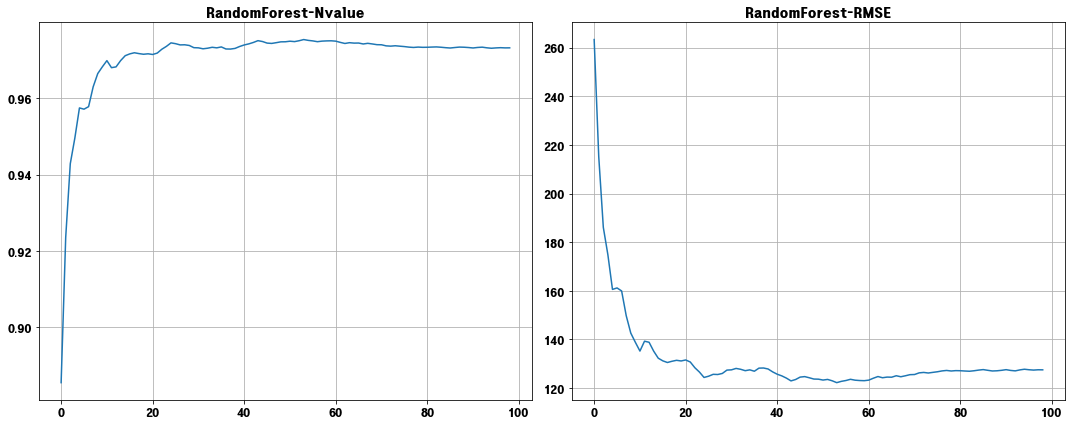

In [93]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharey = False) # 축 범위를 같게하고 싶으면 sharey를 True로 변경

ax = axes[0]
ax.set_title('RandomForest-Nvalue')
ax.plot(plot_list1)
ax.grid()

ax = axes[1]
ax.set_title('RandomForest-RMSE')
ax.plot(plot_list2)
ax.grid()

plt.tight_layout()
plt.show()

In [94]:
rf= RandomForestRegressor(n_estimators = 54,random_state = 7)
rf.fit(train.drop(['Body_Mass'], axis = 1), train.Body_Mass)
RMSE(rf.predict(train.drop(['Body_Mass'], axis = 1)), train.Body_Mass)

122.20640760504725

In [103]:
train.columns

Index(['Species', 'Island', 'Clutch_Completion', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C',
       'Body_Mass'],
      dtype='object')

In [106]:
test.columns = ['id', 'Species', 'Island', 'Clutch_Completion', 'Culmen_Length',
                'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C',]

In [107]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
predict['Body Mass (g)'] = rf.predict(test.drop(['id'], axis = 1))
predict.to_csv(PATH + '\\sample_submission(8_RandomForest).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(8_RandomForest).csv')

,id,Body Mass (g)
0,0,4573.148148
1,1,5574.074074
2,2,3600.000000
3,3,3570.833333
4,4,3557.407407
...,...,...
223,223,4281.481481
224,224,4658.333333
225,225,4375.462963
226,226,3841.666667
